# scikit-learn

scikit-learnには、データの読み込みと変形、様々な機械学習アルゴリズムの効率的な実装、モデル選択や評価の仕組みを統一されるAPIで提供されています。

この一貫性により、ある種類のモデルでscikit-learnの基本的な使い方と構文を理解したなら、新しいモデルやアルゴリズムへの切り替えは簡単です。

## 機械学習

機械学習は、コンピュータが大量のデータを学習することで、データの中に潜むパターンと規則性を抽出する技術です。ここで、「学習」は、観察されたデータをモデルに適合させるための調整可能な「パラメータ」を与えるために行われます。

最も基本的なレベルにおいて、機械学習は「教師あり学習」と「教師なし学習」の二つに分類できます。

- 教師あり学習（Supervised Learning）：教師あり学習では、入力データ（特徴量）とそれに対応する正解ラベル（目標値）のペアを使用してモデルを訓練します。モデルは、入力データと正解ラベルの間の関係やパターンを学習し、未知の入力データに対して正しい予測や分類を行うことが期待されます。
教師あり学習の代表的なタスクには、分類（クラスの予測）や回帰（数値の予測）があります。例えば、手書き数字の画像を入力として与え、それぞれの画像がどの数字に対応するのかを予測する手法や、住宅価格を予測する回帰モデルなどがあります。

- 教師なし学習（Unsupervised Learning）：教師なし学習では、正解ラベルを使わずに入力データのみを使用してモデルを訓練します。モデルはデータ内のパターンや関連性を自動的に発見し、データをクラスタリング（類似したデータのグループ化）や次元削減データの特徴量を圧縮)などの方法で解析します。例えば、顧客セグメンテーションにおいて、似た行動パターンを持つ顧客をグループ化するために教師なし学習を使用することができます。

機械学習は、基本的に以下の手順で構成されます。

- データセットの構築
- 性能指標の選択
- 学習アルゴリズムの実装
- モデル性能の評価

## scikit-learnのデータ表現

In [2]:
from sklearn import datasets
iris= datasets.load_iris()

### 特徴行列

データの情報が数値配列はまた行列と考えることができます。これを「特徴行列」と呼びます。

一般的には、特徴行列は、$「nサンプル,m特徴」$をもつ配列で格納されます。

アイリスデータセットを例にして考えてみましよう。
- データの各行は、観測された一つのサンプルを表します。
- データの各列は、各サンプルの特徴を表す量的情報を持ちます。

### 目的配列

特徴行列に対して、サンプルの長さを持つラベルや目的配列も扱います。

アイリスデータセットの場合、アイリスの種類を表す数値ラベルが目的配列と見なされます。

In [3]:
import pandas as pd
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
# Add the target variable to the DataFrame
iris_df['target'] = iris.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## scikit-learnによる機械学習

scikit-learnは、各機械学習アルゴリズムと幅広い機械学習アプリケーションに一貫したインタフェースを提供するAPIを通じて実装されています。

scikit-learnでは、以下の手順でデータからモデルの学習を行います。

- 適切なモデルを選択し、Estimatorクラスをインポートします。
- モデルのハイパーパラメータの選択とインスタンス化
- データの準備
  - 教師あり学習では、特徴量・ラベルデータをモデル学習用の訓練データとモデル評価用のテストデータに分ける
  - 教師なし学習では、特徴量データを準備
- インスタンスの```fit()```メソッドを呼び出し、学習を行う
- モデルの評価
  - 教師あり学習では、```predict()``` メソッドを用いてテストデータの特徴量データからラベルデータを予測しその精度の評価を行う
  - 教師なし学習では、```transform()``` または ```predict()``` メソッドを用いて特徴量データのクラスタリングや次元削減などを行う

### 教師あり学習・分類の例

アイリスデータセットを用いて花の4つの特徴から3つの花の種類を分類するタスクを考えてみましょう。

#### モデルのクラスの選択

scikit-learnでは、全てのモデルはPythonクラスとして実装されており、ここでは分類を行うモデルの1つであるロジスティック回帰 ([```LogisticRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)) クラスをインポートしています。

In [4]:
from sklearn.linear_model import LogisticRegression

#### モデルのハイパーパラメータの選択

モデルのクラスに応じて、ハイパーパラメータでモデルを調整することは可能です。

In [225]:
model=LogisticRegression(solver='lbfgs',  multi_class='auto')

### データの準備

教師あり学習では、特徴量(特徴行列)・ラベルデータ(目的行列)をモデル学習用の訓練データとモデル評価用のテストデータに分ける必要があります。

- 基本的には、特徴量のサンプルとラベルのサンプルを同じ長さに保つ必要があります。ここでは、アイリスデータセットは既に正しい形式で整形されました。
- ```train_test_split()``` でデータセットを訓練データとテストデータに分割できます。ここでは、```train_test_split()``` 関数の ```test_size``` 引数にデータセットの$30%$をテストデータとすることを指定しています。また、```stratify``` 引数にラベルデータを指定することで、訓練データとテストデータ、それぞれでラベルの分布が同じになるようにしています。

In [226]:
from sklearn.model_selection import train_test_split
from sklearn import datasets

iris= datasets.load_iris()
X = iris.data # 特徴量データ
y = iris.target # ラベルデータ

assert len(X) == len(y)

# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)


### データをモデルに当てはめる

```fit()```メソッドは、モデルに依存する計算を内部で実行し、計算の結果は、ユーザが調べられるようにモデルの[属性](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)に格納されます。

In [227]:
model.fit(X_train, y_train) # モデルを訓練データに適合

LogisticRegression()

In [228]:
model.classes_

array([0, 1, 2])

### モデルで未知のラベルを予測する

モデルが訓練できたら、教師データに含まれていなかった新しいデータに対してラベルを予測し、評価を行うことは可能です。

```accuracy_score()``` はモデルの予測精度を評価するための関数です。

In [229]:
y_predicted=model.predict(X_test) # テストデータでラベルを予測

In [230]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predicted) # 予測精度（accuracy）の評価

0.9777777777777777

### 教師あり学習・回帰の例

以下では、アイリスデータセットを用いて花の特徴の1つ、petal_length、からもう1つの特徴、petal_width、を回帰する手続きを示しています。

この時、petal_length は特徴量、petal_width は連続値のラベルとなっています。

散布図を用いて petal_length と petal_width の関係を可視化してみると、関係があるといえそうでしょうか。

Text(0, 0.5, 'Petal Width (cm)')

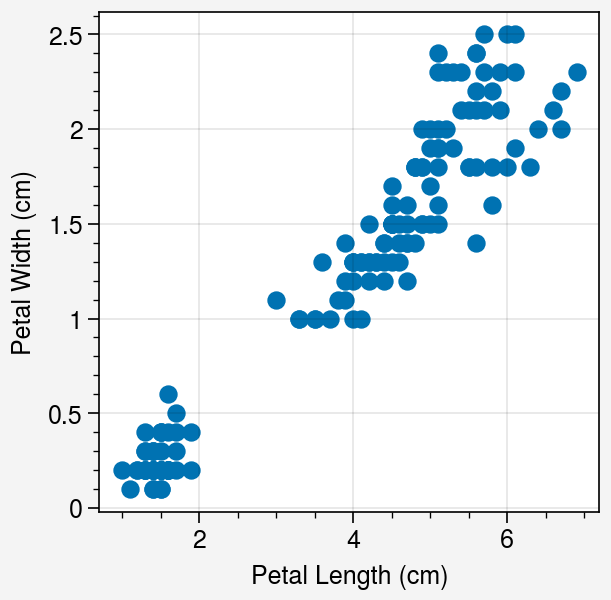

In [7]:
import proplot as pplt
fig, ax = pplt.subplots()

iris= datasets.load_iris()
X = iris.data # 特徴量データ


# Extract petal length and petal width
petal_length = X[:, 2]
petal_width = X[:, 3]

# Create a scatter plot using proplot

ax.scatter(petal_length, petal_width)
# Set plot labels and title
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')


ここで、回帰を行うモデルの1つである線形回帰 ([```LinearRegression```](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)) を実装します。

```mean_squared_error()``` は平均二乗誤差によりモデルの予測精度を評価するための関数です。



In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

iris= datasets.load_iris()
X = iris.data[:, 2:3]  # Petal length as input feature
y = iris.data[:, 3]  # Petal width as target variable


# 訓練データとテストデータに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model=LinearRegression() # 線形回帰モデル
model.fit(X_train,y_train) # モデルを訓練データに適合
y_predicted=model.predict(X_test) # テストデータで予測
mean_squared_error(y_test,y_predicted) # 予測精度（平均二乗誤差）の評価

NameError: name 'train_test_split' is not defined

線形回帰モデルにより学習された petal_length と petal_width の関係を表す回帰式を可視化しています。学習された回帰式が実際のデータに適合していることがわかります。

NameError: name 'X_test' is not defined

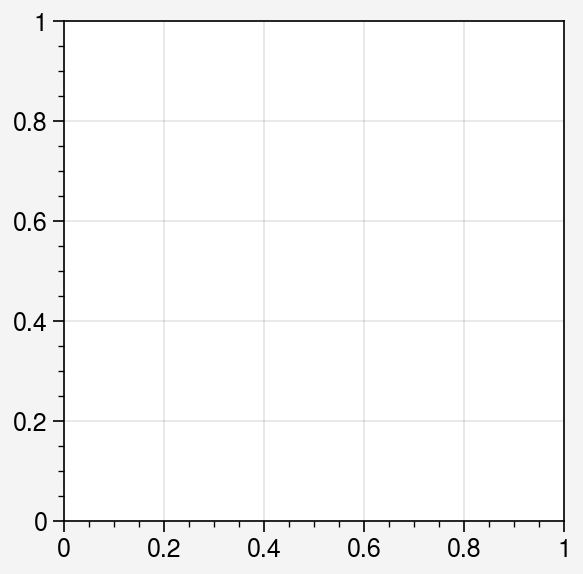

In [9]:
# Create a scatter plot with regression line using proplot
fig, ax = pplt.subplots()
ax.scatter(X_test, y_test, label='Actual')
ax.plot(X_test, y_predicted, c='red', label='Regression Line')

# Set plot labels and title
ax.set_xlabel('Petal Length (cm)')
ax.set_ylabel('Petal Width (cm)')

# Add legend
ax.legend()

# Show the plot
fig.show()

````{tab-set}
```{tab-item} 実習問題
[Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron)で花の種類を分類するモデルを実装しなさい。
```
````

### 教師なし学習・クラスタリングの例

教師なし学習の例として、アイリスデータセットをクラスタリングすることを考えましょう。

クラスタリングは、データセット内の類似した特徴を持つデータポイントをグループ化する手法です。クラスタリングの目的は、データ内の潜在的な構造やパターンを明らかにすることや、データをより理解しやすくすることです。

ここでは、 [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)でアイリスデータセットをクラスタリングする手続きを示しています。

- ```KMeans``` クラスをインポートします
- 特徴量データを用意します
- 引数 ```n_clusters``` にハイパーパラメータとしてクラスタ数を指定して、 ```KMeans``` クラスのインスタンスを作成しています。
- ```fit()``` メソッドによりモデルをデータに適合させます
- ```predict()``` メソッドを用いて各データが所属するクラスタの情報 (```y_km```) を取得しています。

In [10]:
from sklearn.cluster import KMeans

# アイリスデータセットの読み込み
iris = datasets.load_iris()
X = iris.data

# PCAモデルのインスタンス化とデータの変換
model = KMeans(n_clusters=3) #引数 n_clusters にハイパーパラメータとしてクラスタ数
model.fit(X) # モデルをデータに適合
y_km=model.predict(X) # クラスタを予測

/opt/anaconda3/envs/jupyterbook/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


学習された各花データのクラスタ情報を元のデータセットのデータフレームに列として追加し、クラスタごとに異なる色でデータセットを可視化しています。

/var/folders/wm/5xxpvjcj15g89khxd5jwn9200000gn/T/ipykernel_69660/1961911079.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


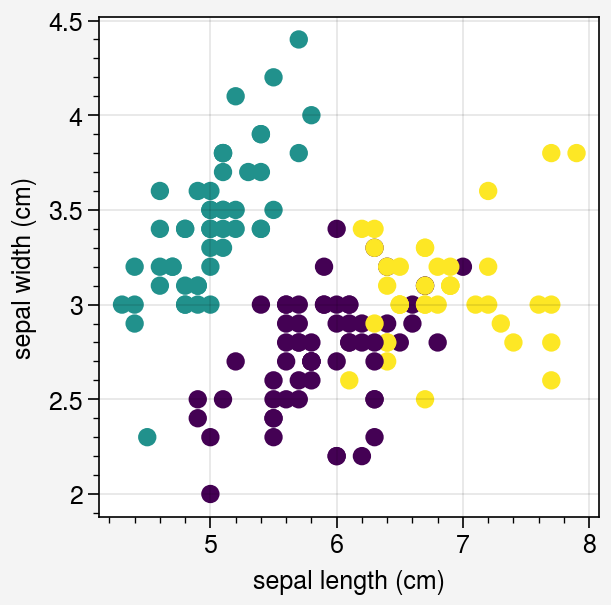

In [11]:
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['cluster'] = y_km

# クラスタごとに色分けしてプロット
fig, ax = pplt.subplots()
ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['cluster'], cmap='viridis')

# Set plot labels and title
ax.set_xlabel('sepal length (cm)')
ax.set_ylabel('sepal width (cm)')

# Show the plot
fig.show()

````{tab-set}
```{tab-item} 実習問題1
ガウス混合モデル(GMM)でアイリスデータセットのクラスタリングを実装しなさい。
```
```{tab-item} 実習問題2
クラスタリングの結果と真のラベルと比較して、精度を計算しなさい。

注意：クラスタリングでは真のラベルを利用するのではなく、クラスタリング結果のラベルを使用して精度を計算します。クラスタリング結果のラベルは、真のクラスラベルとは異なる順序やラベル付けを持つ場合があります。
```
````

## scikit-learnによる特徴エンジニアリング

特徴エンジニアリング（Feature Engineering）は、機械学習アルゴリズムがうまく学習できるために、入力データの特徴（特徴量）を適切に抽出、選択、変換するプロセスです。

特徴エンジニアリングは、ドメイン知識や実験に基づいて行われるため、データの理解や探索的データ分析が重要です。また、特徴エンジニアリングは機械学習モデルの性能に大きな影響を与えるため、適切な特徴量の設計や変換はモデルの成功において重要なステップです。

scikit-learnには、特徴エンジニアリングに役立つさまざまなモジュールや関数が用意されています。

ここでは、もう少し複雑なデータでscikit-learnによるいくつか有用な特徴エンジニアリング手法を紹介します。

housingデータセットには、住宅に関連するさまざまな特徴量（説明変数）とそれに対応する住宅価格（目的変数）が含まれています。

In [237]:
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 欠損値の処理

In [238]:
housing[housing["total_bedrooms"].isnull()]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
182,-118.27,34.04,13.0,1784.0,NaN,2158.0,682.0,1.7038,118100.0,<1H OCEAN
327,-117.65,34.04,15.0,3393.0,NaN,2039.0,611.0,3.9336,151000.0,INLAND
366,-122.50,37.75,44.0,1819.0,NaN,1137.0,354.0,3.4919,271800.0,NEAR OCEAN
477,-117.99,34.14,30.0,2346.0,NaN,1988.0,474.0,2.5625,153000.0,INLAND
495,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,NaN,1417.0,302.0,2.3333,92100.0,<1H OCEAN
19952,-119.19,34.20,18.0,3620.0,NaN,3171.0,779.0,3.3409,220500.0,NEAR OCEAN
20088,-119.73,36.83,8.0,3602.0,NaN,1959.0,580.0,5.3478,138800.0,INLAND
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,410700.0,<1H OCEAN


scikit-learnの```SimpleImputer```は、欠損値を補完するための便利なツールです。
- 各変数の欠損値をその変数の中央値で置き換えることを指定して、```SimpleImputer```のインスタンスを作成する。
- ```fit()```メソッドを使って、データに```imputer```インスタンスを適合させられます。
- ```imputer```は各変数の中央値を計算し、```statistics_```に結果を格納しています。
- ```transform```で「訓練した」```imputer```を使って、欠損値を中央値に置き換えます。

In [239]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [240]:
imputer.fit(housing.drop("ocean_proximity", axis=1)) # 文字列属性は除外

SimpleImputer(strategy='median')

In [241]:
imputer.statistics_

array([-1.1849e+02,  3.4260e+01,  2.9000e+01,  2.1270e+03,  4.3500e+02,
        1.1660e+03,  4.0900e+02,  3.5348e+00,  1.7970e+05])

In [242]:
X= imputer.transform(housing.drop("ocean_proximity", axis=1))

In [243]:
housing_tr = pd.DataFrame(X, columns=housing.drop("ocean_proximity", axis=1).columns)

In [244]:
# total_bedroomsの欠損値が中央値に置き換えられました
housing_tr.iloc[housing[housing["total_bedrooms"].isnull()].index]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
182,-118.27,34.04,13.0,1784.0,435.0,2158.0,682.0,1.7038,118100.0
327,-117.65,34.04,15.0,3393.0,435.0,2039.0,611.0,3.9336,151000.0
366,-122.50,37.75,44.0,1819.0,435.0,1137.0,354.0,3.4919,271800.0
477,-117.99,34.14,30.0,2346.0,435.0,1988.0,474.0,2.5625,153000.0
495,-114.59,34.83,41.0,812.0,435.0,375.0,158.0,1.7083,48500.0
...,...,...,...,...,...,...,...,...,...
19880,-118.23,33.94,36.0,1110.0,435.0,1417.0,302.0,2.3333,92100.0
19952,-119.19,34.20,18.0,3620.0,435.0,3171.0,779.0,3.3409,220500.0
20088,-119.73,36.83,8.0,3602.0,435.0,1959.0,580.0,5.3478,138800.0
20325,-118.88,34.17,15.0,4260.0,435.0,1701.0,669.0,5.1033,410700.0


### スケーリング

特徴量スケーリングは、異なるスケールや範囲を持つ特徴量を統一された形に変換するプロセスです。

多くの機械学習アルゴリズムは、入力特徴量のスケールが大きく異なると性能をうまく発揮できないです。

すべでの変数のスケールを統一するためによく使われている方法としては、
- 正規化(normalization): 特徴量を0から1の範囲にスケーリングする　$X_{normalized} = (X - X_{min}) / (X_{max} - X_{min})$
- 標準化(standarization):　特徴量を平均が0、標準偏差が1となるようにスケーリングする $X_{standardized} = (X - X_{mean}) / X_{std}$

があげられます。


In [245]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_features =  scaler.fit_transform(housing.drop("ocean_proximity", axis=1))
housing_tr = pd.DataFrame(scaled_features, columns=housing.drop("ocean_proximity", axis=1).columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0.211155,0.567481,0.784314,0.022331,0.019863,0.008941,0.020556,0.539668,0.902266
1,0.212151,0.565356,0.392157,0.180503,0.171477,0.067210,0.186976,0.538027,0.708247
2,0.210159,0.564293,1.000000,0.037260,0.029330,0.013818,0.028943,0.466028,0.695051
3,0.209163,0.564293,1.000000,0.032352,0.036313,0.015555,0.035849,0.354699,0.672783
4,0.209163,0.564293,1.000000,0.041330,0.043296,0.015752,0.042427,0.230776,0.674638


In [246]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing.drop("ocean_proximity", axis=1))
housing_tr = pd.DataFrame(scaled_features, columns=housing.drop("ocean_proximity", axis=1).columns)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-1.327835,1.052548,0.982143,-0.804819,-0.970325,-0.974429,-0.977033,2.344766,2.129631
1,-1.322844,1.043185,-0.607019,2.045890,1.348276,0.861439,1.669961,2.332238,1.314156
2,-1.332827,1.038503,1.856182,-0.535746,-0.825561,-0.820777,-0.843637,1.782699,1.258693
3,-1.337818,1.038503,1.856182,-0.624215,-0.718768,-0.766028,-0.733781,0.932968,1.165100
4,-1.337818,1.038503,1.856182,-0.462404,-0.611974,-0.759847,-0.629157,-0.012881,1.172900


### テキストの処理

テキストデータは通常、単語や文字のシーケンスとして表現されますが、機械学習モデルに入力するためには数値データに変換する必要があります。

テキストの特徴量スケーリングの方法は色々ありますが、ここでは単純な手法だけ紹介します。

テキストを数値のカテゴリに変換します

In [247]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_encoded[:10]

array([[3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [248]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

one-hot encoding

- one-hot encodingは、カテゴリカルな特徴量をバイナリベクトルの形式に変換し、各カテゴリの存在・非存在を表現する方法です。

![](https://miro.medium.com/v2/resize:fit:1022/1*lS-1YL8UfhcSFnZ5weIMdg.png)

In [249]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing[["ocean_proximity"]])
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

### 変換パイプライン

scikit-learnの変換パイプラインは、データの前処理や特徴量エンジニアリングの手順を効率的に実行するための便利なツールです。

データの特徴量エンジニアリングのステップはいくつもあり、正しい順序で実行しなければなりません。そのような処理シーケンスを実行しやすくため```Pipeline```クラスを使います。

In [250]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("std_scaler", StandardScaler())])

In [251]:
housing_num_tr = num_pipeline.fit_transform(housing.drop(["ocean_proximity","median_house_value"], axis=1))

さらに、すべての列に対して実行し、各列に適切な変換を設置することもできます。

In [252]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing.drop(["ocean_proximity","median_house_value"], axis=1))
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)])


In [253]:
housing_prepared = full_pipeline.fit_transform(housing)

In [254]:
pd.DataFrame(housing_prepared).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,0.0,0.0,0.0,1.0,0.0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,0.0,0.0,0.0,1.0,0.0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,0.0,0.0,0.0,1.0,0.0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,0.0,0.0,0.0,1.0,0.0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,0.0,0.0,0.0,1.0,0.0


### モデルの実装

In [255]:
housing.drop(["ocean_proximity","median_house_value"], axis=1).dropna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [256]:
X_train, X_test, y_train, y_test = train_test_split(housing_prepared, housing["median_house_value"], test_size=0.2, random_state=42)

In [257]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)

# モデルの評価
print('testing score:', r2_score(y_test, y_pred))

testing score: 0.6488449730627456


In [258]:
from sklearn.tree import DecisionTreeRegressor
tree_regressor = DecisionTreeRegressor(max_depth = 10).fit(X_train, y_train)
y_pred = tree_regressor.predict(X_test)
print('testing score:', r2_score(y_test, y_pred))

testing score: 0.7257566704133368


## まとめ

scikit-learnでは、一貫した単純なインターフェースを持っています。

- **推定器（Estimator）**: 機械学習モデルをトレーニングするための基本的なインターフェースを提供します。主な目的は、与えられたデータからパターンや関係性を学習し、未知のデータに対して予測を行うことです。推定器のクラスは、```fit()```メソッドを実装しており、トレーニングデータを受け取り、モデルのパラメータを適合させます。

- **変換器（Transformer）**: データの前処理や特徴量エンジニアリングのためのインターフェースを提供します。主な目的は、データの変換や特徴量の抽出、次元削減などの操作を行うことです。変換は、変換対象のデータセットを引数として```transform()```メソッドで行われます。

- **予測器（Predictor）**: トレーニングされたモデルを使用して未知のデータに対して予測を行うためのインターフェースを提供します。予測器のクラスは、```predict()```メソッドを実装しており、トレーニング済みのモデルを使用して新しいデータの予測を行います。


これらのインターフェースは、scikit-learnの設計の中核をなしており、推定器、変換器、予測器の組み合わせによって、データの前処理、モデルのトレーニング、予測の一連の処理を柔軟に組み立てることができます。また、これらの概念に基づく一貫したインターフェースは、異なるモデルや手法の組み合わせや比較を容易にし、効果的な機械学習ワークフローの構築を支援します。